In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

df = pd.read_csv("data_cleaned.csv")

display(df)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


___
### Statistiques descriptives
___

### Analyse univariée

Dans cette partie, on étudie quelques variables intéressantes de notre dataframe pour en extraire les caractéristiques importantes. Cette étape permet d'avoir un premier aperçu de nos données avant de les croiser.

In [3]:
df.describe().round(2)

,age,sex,bmi,children,smoker,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00
mean,39.22,0.5,30.66,1.10,0.2,13279.12
std,14.04,0.5,6.10,1.21,0.4,12110.36
min,18.00,0.0,15.96,0.00,0.0,1121.87
25%,27.00,0.0,26.29,0.00,0.0,4746.34
50%,39.00,0.0,30.40,1.00,0.0,9386.16
75%,51.00,1.0,34.70,2.00,0.0,16657.72
max,64.00,1.0,53.13,5.00,1.0,63770.43


#### Pour les variables catégorielles, on calcule les effectifs et les pourcentages.

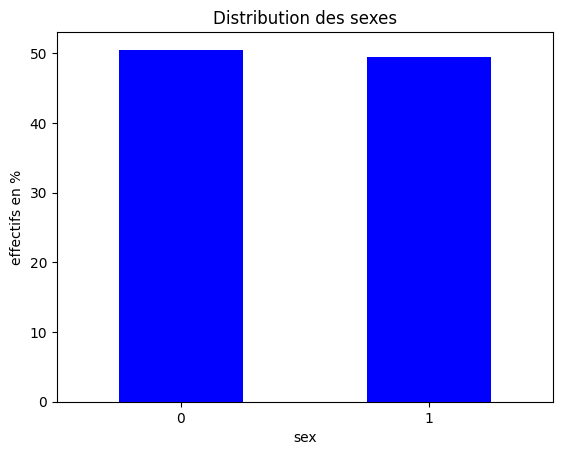

In [4]:
#calcule les effectifs et les %
df['sex'].value_counts() 
distri_sex = df['sex'].value_counts(normalize=True).round(4).mul(100)

distri_sex.plot(kind='bar', rot=0, color='blue')
plt.title("Distribution des sexes")
plt.ylabel('effectifs en %')
plt.show()


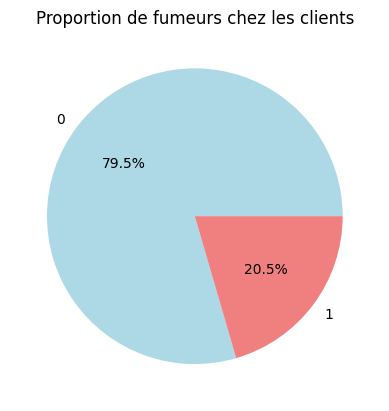

In [5]:
df['smoker'].value_counts()
distri_smoker = df['smoker'].value_counts(normalize=True).round(4).mul(100)


distri_smoker.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lightcoral'])
plt.title('Proportion de fumeurs chez les clients')
plt.ylabel('')
plt.show()

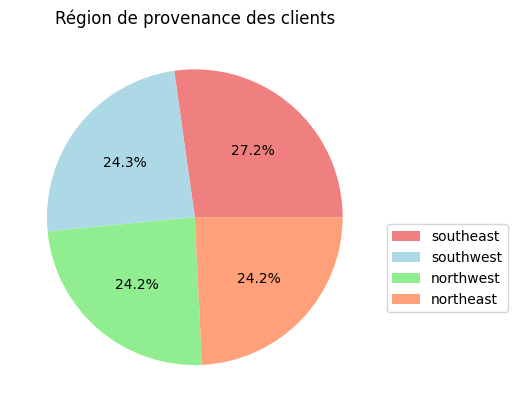

In [6]:
df['region'].value_counts()
distri_region = df['region'].value_counts(normalize=True).round(4).mul(100)

distri_region.plot(kind='pie', autopct='%1.1f%%', labels= None, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Région de provenance des clients')
plt.ylabel('')

plt.legend(labels=distri_region.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Pour les variables numériques, on peut analyser la distribution des données avec des outils comme l'histogramme ou la boîte à moustache.  Le boxplot est particulièrement utile car il aide à visualiser la symétrie des données.

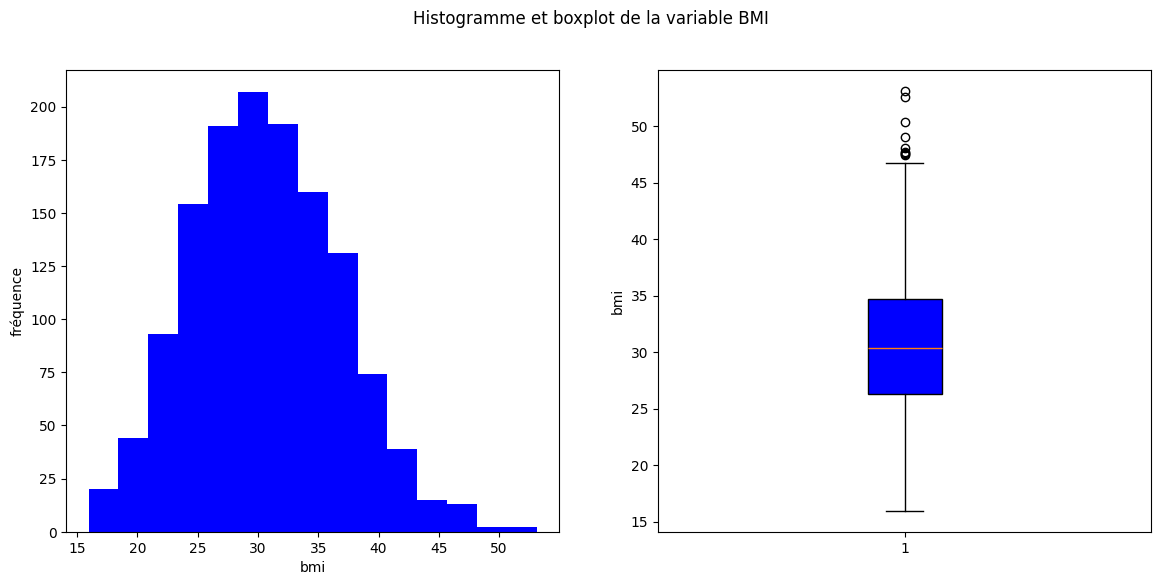

In [7]:
#Dispersion de la variable BMI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle('Histogramme et boxplot de la variable BMI')

ax1.hist(df['bmi'], color = 'blue', bins=15)
ax1.set_xlabel('bmi')
ax1.set_ylabel('fréquence')

ax2.boxplot(df['bmi'], patch_artist=True ,boxprops=dict(facecolor='blue'))
ax2.set_ylabel('bmi')

plt.show()

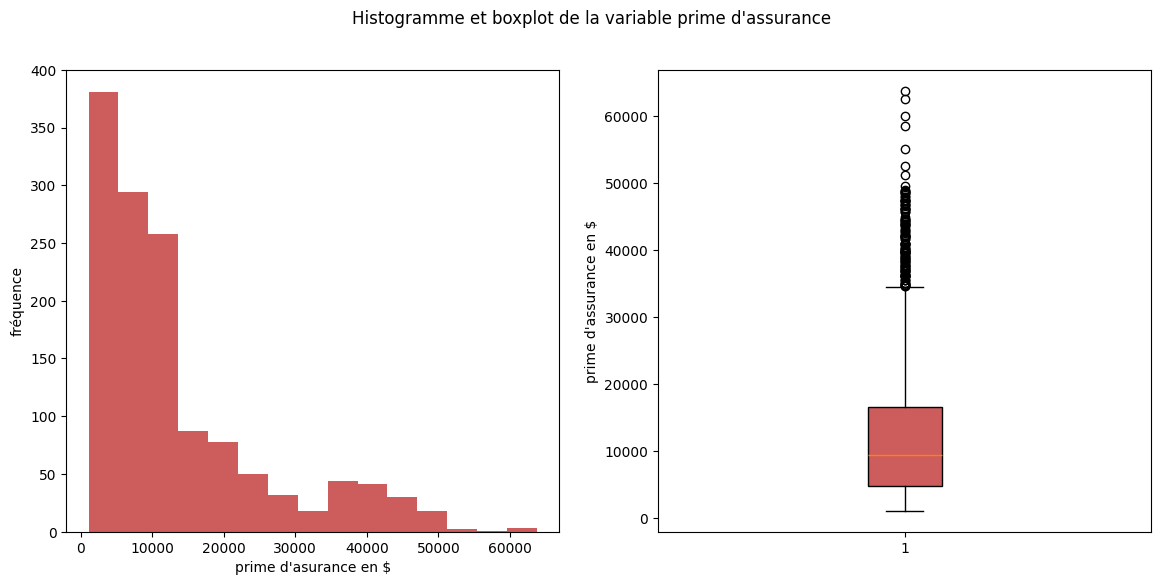

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Histogramme et boxplot de la variable prime d'assurance")

ax1.hist(df['charges'], color = 'indianred', bins=15)
ax1.set_xlabel("prime d'asurance en $")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['charges'], patch_artist=True ,boxprops=dict(facecolor='indianred'))
ax2.set_ylabel("prime d'assurance en $")

plt.show()

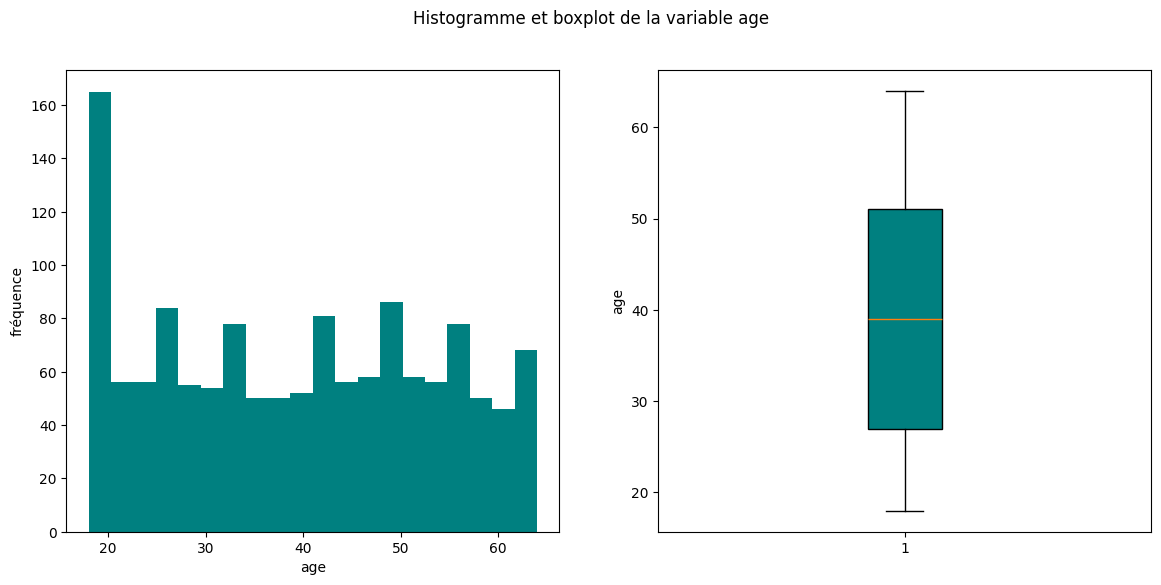

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Histogramme et boxplot de la variable age")

ax1.hist(df['age'], color = 'teal', bins=20)
ax1.set_xlabel("age")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['age'], patch_artist=True ,boxprops=dict(facecolor='teal'))
ax2.set_ylabel("age")

plt.show()

### Analyse bivariée

La premiere étape de l'analyse bivariée c'est à dire, l'analyse entre 2 variables, c'est de calculer la matrice de corrélation et de la visualiser à l'aide de la heatmap proposée dans la librairie seaborn. 

Pour ce faire, nous mettons de côté les variables catégorielles pour le moment car la matrice de correlation évalue uniquement le lien linéaire entre deux variables quantitatives.

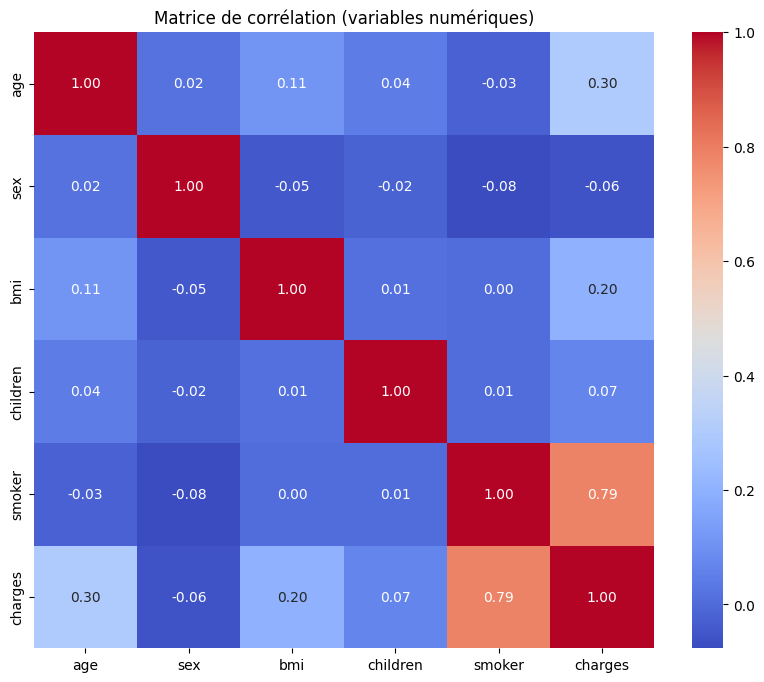

In [10]:

df_numerique = df.select_dtypes(include=['float64', 'int64'])

corr= df_numerique.corr() #creer la matrice de corrélation

plt.figure(figsize=(10, 8)) #creer la heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') #fmt indique le presenter les correlations à 2 chiffres aprés la virgule
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

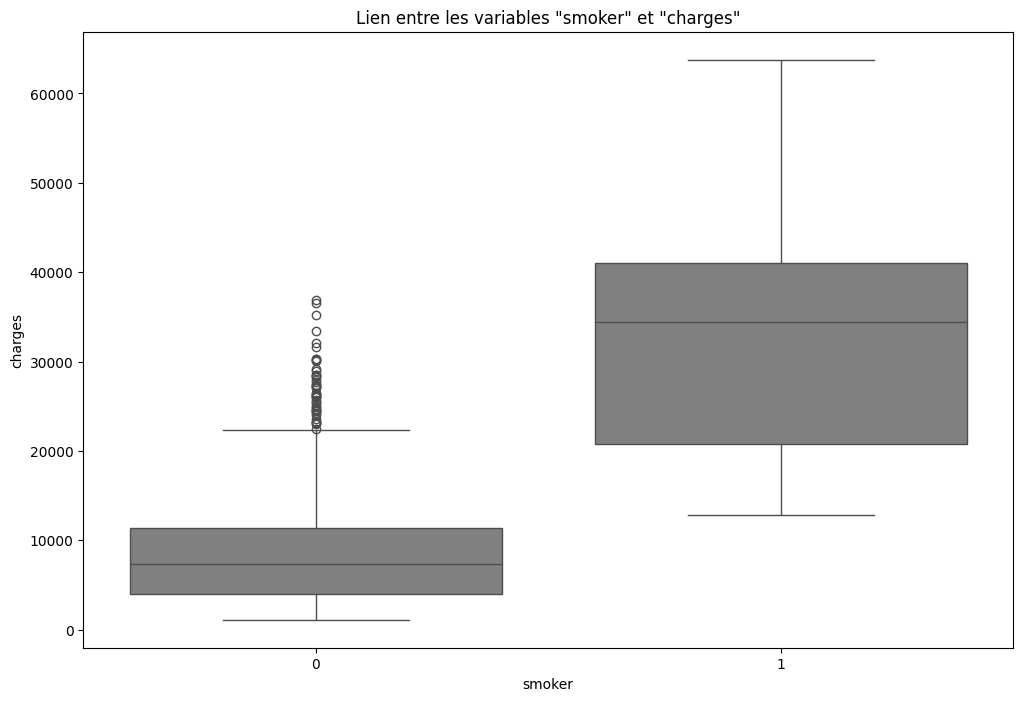

In [21]:
#la matrice montre un lien fort entre le fait de fumer et payer une prime lourde. Visualisons la relation avec des boxplots pour chaque catégoriue de la variable 'smoker'.

plt.figure(figsize=(12,8))
sns.boxplot(x='smoker', y='charges', data = df, color='grey')
plt.title('Lien entre les variables "smoker" et "charges"')

plt.show()


On peut déjà émettre des constats, pour les non-fumeurs:
    - la médiane est centrée à environ 8 000 $: la majorité des non fumeurs sont regroupés autour de cette valeur.
    - la boite compacte signifie une dispersion faible des charges dans cette population;
    - la moustache supérieure signale la présence de quelques outliers.

Pour les fumeurs:
    - la médiane est plus élevée (35 000$),
    - la boite est plus etiree, les valeurs des charges sont plus dispersees que chez les non-fumeurs

Pour approfondir l'analyse, on fait un test statistique pour évaluer la significativité des charges pour les fumeurs et non-fumeurs.

In [23]:
from scipy.stats import ttest_ind
#le but est d'étudier les moyennes des charges chez les groupes fumeur et non fumeur
group1 = df[df['smoker']==0]
group2 = df[df['smoker']==1]

ttest_ind(group1['charges'], group2['charges'])

TtestResult(statistic=-46.64479459840305, pvalue=1.4067220949376498e-282, df=1335.0)

On observe que t test statistique = -46,65 et p-value=1.41*10^-282
p-value < 0,05 donc on peut conclure que les differences entre les moyennes de charges entre les 2 groupes sont significatives

Etudions maintenant le lien entre lers variables age et charges. 

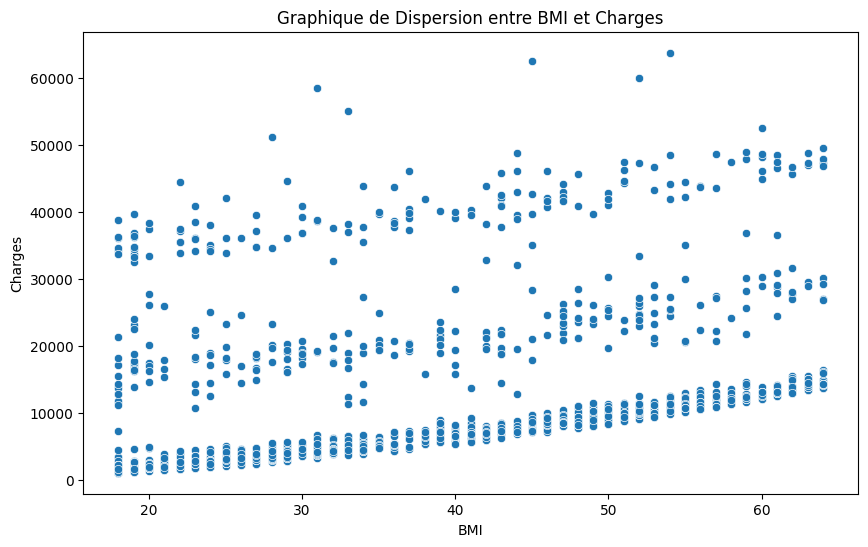

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Graphique de Dispersion entre BMI et Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

On obtient 3 nuages de points distinctifs qui representeraient chacun 3 courbes évoluant en parallèle. Il s'agirait des 3 groupes distincts et donc une autre variable catégorielle serait le facteur d'influence.

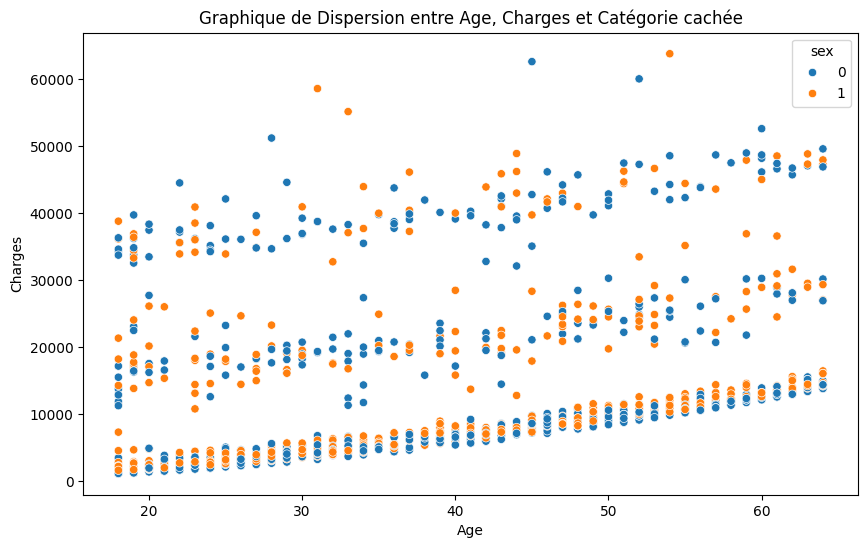

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='sex', data=df)
plt.title('Graphique de Dispersion entre Age, Charges et Catégorie cachée')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()